In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import typing
from sklearn.model_selection import train_test_split

In [9]:
train=pd.read_csv('train.csv')
train_full=train.copy()
test_full=pd.read_csv('test.csv')
train_full.head(10)

,tracking_id,datetime,wind_speed(m/s),atmospheric_temperature(°C),shaft_temperature(°C),blades_angle(°),gearbox_temperature(°C),engine_temperature(°C),motor_torque(N-m),generator_temperature(°C),...,windmill_body_temperature(°C),wind_direction(°),resistance(ohm),rotor_torque(N-m),turbine_status,cloud_level,blade_length(m),blade_breadth(m),windmill_height(m),windmill_generated_power(kW/h)
0,WM_33725,2019-08-04 14:33:20,94.820023,-99.000000,41.723019,-0.903423,82.410573,42.523015,2563.124522,76.665560,...,NaN,239.836388,2730.310605,42.084666,BA,Medium,2.217542,0.314065,24.281689,6.766521
1,WM_698,2018-11-05 10:13:20,241.832734,27.764785,-99.000000,-99.000000,44.104919,46.258870,2372.384119,78.129803,...,NaN,337.944723,1780.207200,107.888643,A2,Medium,4.210346,0.448494,27.262139,5.966275
2,WM_39146,2019-09-14 14:03:20,95.484724,NaN,41.855473,12.652763,42.322098,42.878552,1657.169646,67.654469,...,45.033197,227.850294,1666.049900,-42.931459,ABC,Medium,2.719475,0.302321,27.366127,2.874342
3,WM_6757,2018-12-25 15:33:20,238.819424,-99.000000,45.443914,15.115323,44.759643,47.282101,2888.134079,95.389974,...,44.827154,492.081520,1964.502895,42.744596,ABC,NaN,4.857385,0.367140,24.287767,14.851089
4,WM_21521,2019-05-04 03:13:20,10.722890,NaN,41.981183,1.715696,-17.616459,43.469852,781.695419,37.423065,...,-99.000000,259.274601,1177.516152,13.387289,AAA,Medium,NaN,0.453374,27.971650,3.519074
5,WM_17873,2019-03-22 21:03:20,93.769973,30.326226,17.970619,-99.000000,43.816430,40.815795,2119.351653,72.345126,...,101.378184,NaN,1715.244121,97.746463,ABC,Low,2.504098,0.395642,24.673292,4.945780
6,WM_19873,2019-04-17 18:33:20,16.026249,-99.000000,44.072819,-0.196845,41.680583,43.384904,778.109985,40.284018,...,43.008746,528.003985,1222.931270,11.805113,BD,Low,2.917922,0.447341,33.593511,5.089173
7,WM_30330,2019-07-08 21:03:20,48.737826,12.716815,43.217778,-99.000000,-48.405089,44.125843,980.988531,43.691867,...,-99.000000,NaN,1177.637341,18.384873,BA,Low,2.938810,0.354881,29.944821,8.536889
8,WM_26069,2019-06-07 17:53:20,47.081729,-99.000000,-33.607048,-99.000000,43.055427,45.253628,957.580151,41.609787,...,43.216062,281.368625,-99.000000,19.486763,ABC,Low,1.651438,0.301550,46.733509,8.739166
9,WM_28915,2019-06-28 16:13:20,283.789329,18.887932,41.691469,52.337026,-62.724362,41.881256,1042.086135,65.280225,...,-99.000000,352.268521,1662.076277,20.100683,AC,Extremely Low,1.060817,0.201699,24.324068,1.948810


In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28200 entries, 0 to 28199
Data columns (total 22 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   tracking_id                     28200 non-null  object 
 1   datetime                        28200 non-null  object 
 2   wind_speed(m/s)                 27927 non-null  float64
 3   atmospheric_temperature(°C)     24750 non-null  float64
 4   shaft_temperature(°C)           28198 non-null  float64
 5   blades_angle(°)                 27984 non-null  float64
 6   gearbox_temperature(°C)         28199 non-null  float64
 7   engine_temperature(°C)          28188 non-null  float64
 8   motor_torque(N-m)               28176 non-null  float64
 9   generator_temperature(°C)       28188 non-null  float64
 10  atmospheric_pressure(Pascal)    25493 non-null  float64
 11  area_temperature(°C)            28200 non-null  float64
 12  windmill_body_temperature(°C)   

In [12]:
train_full.turbine_status.unique()

array(['BA', 'A2', 'ABC', 'AAA', 'BD', 'AC', 'BB', 'BCB', 'B', 'AB', nan,
       'B2', 'BBB', 'A', 'D'], dtype=object)

In [31]:
train_full.drop(['tracking_id','datetime'],axis=1,inplace=True)
train_full.dropna(subset=['windmill_generated_power(kW/h)'],axis=0, inplace=True)
test_full.drop(['tracking_id','datetime'],axis=1,inplace=True)


In [32]:
train_full.head(2)

,wind_speed(m/s),atmospheric_temperature(°C),shaft_temperature(°C),blades_angle(°),gearbox_temperature(°C),engine_temperature(°C),motor_torque(N-m),generator_temperature(°C),atmospheric_pressure(Pascal),area_temperature(°C),windmill_body_temperature(°C),wind_direction(°),resistance(ohm),rotor_torque(N-m),turbine_status,cloud_level,blade_length(m),blade_breadth(m),windmill_height(m),windmill_generated_power(kW/h)
0,94.820023,-99.000000,41.723019,-0.903423,82.410573,42.523015,2563.124522,76.665560,103402.961872,26.897875,NaN,239.836388,2730.310605,42.084666,BA,Medium,2.217542,0.314065,24.281689,6.766521
1,241.832734,27.764785,-99.000000,-99.000000,44.104919,46.258870,2372.384119,78.129803,17030.904078,39.801469,NaN,337.944723,1780.207200,107.888643,A2,Medium,4.210346,0.448494,27.262139,5.966275


In [5]:
train_full.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27993 entries, 0 to 28199
Data columns (total 20 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   wind_speed(m/s)                 27722 non-null  float64
 1   atmospheric_temperature(°C)     24571 non-null  float64
 2   shaft_temperature(°C)           27991 non-null  float64
 3   blades_angle(°)                 27781 non-null  float64
 4   gearbox_temperature(°C)         27992 non-null  float64
 5   engine_temperature(°C)          27981 non-null  float64
 6   motor_torque(N-m)               27969 non-null  float64
 7   generator_temperature(°C)       27981 non-null  float64
 8   atmospheric_pressure(Pascal)    25303 non-null  float64
 9   area_temperature(°C)            27993 non-null  float64
 10  windmill_body_temperature(°C)   25641 non-null  float64
 11  wind_direction(°)               22935 non-null  float64
 12  resistance(ohm)                 

In [33]:
"Checking the null/NaN values in dataset "

def compare_null_values (df_train:pd.DataFrame,df_test:pd.DataFrame):

    l=df_train.select_dtypes(include=['object','int64','float64']).columns

    results=[]

    for i in l:
        sum_na=df_train[i].isna().sum()
        sum_na += np.sum(df_train[i] == "nan")
        if sum_na>0:
            print(i,',',str(sum_na),',',round((sum_na/len(df_train))*100),'%')
            results.append(i)
    sns.barplot(y=df_train[results].isnull().sum().index, x=df_train[results].isnull().sum().values)
    plt.show()

    print('****')
    for i in df_test.select_dtypes(include=['object','int64','float64']).columns:
        sum_na=df_test[i].isna().sum()
        sum_na +=np.sum(df_test[i]=="nan")
        if sum_na>0:
            print(i,',',str(sum_na),',',round((sum_na/len(df_test))*100),'%')
            results.append(i)
    sns.barplot(y=df_test[results].isnull().sum().index, x=df_test[results].isnull().sum().values)
    plt.show()

In [34]:
def detect_duplicates(df_temp : pd.DataFrame, silent : bool = False, id_cols : typing.List = []) -> None: 
            """
            Detect duplicates in data and return the columns in which duplicates where detected.

            Parameters
            ----------
            df_temp : pd.DataFrame
                Dataframe to detect duplicates in
            silent : bool
                Whether to run print statements 
            id_cols : typing.List
                Given id cols that aren't auto detected - Useful if there is an obvious ID column that also wants to be detected for duplication
            """
            # Filter out identity columns
            cols_to_use = []
            for col in df_temp.columns:
                if len(df_temp[col].unique()) != len(df_temp[col]):
                    cols_to_use.append(col)
                elif col not in id_cols:
                    id_cols.append(col)
            id_temp = df_temp.copy()[id_cols]
            df_temp = df_temp.copy()[cols_to_use]    
            count_dupes = df_temp.duplicated().sum()
            count_dupes_in_ID = id_temp.duplicated().sum()
            if not silent:
                print('Duplicates in data: ', str(count_dupes))
                print('Duplicates in id columns: ', str(count_dupes_in_ID))
                print('When filtering out id columns: ', str(id_cols))

In [7]:
detect_duplicates(train_full)

Duplicates in data:  0
Duplicates in id columns:  0
When filtering out id columns:  ['blade_breadth(m)']


In [8]:
detect_duplicates(test_full)

Duplicates in data:  0
Duplicates in id columns:  0
When filtering out id columns:  ['blade_breadth(m)']


<AxesSubplot:>

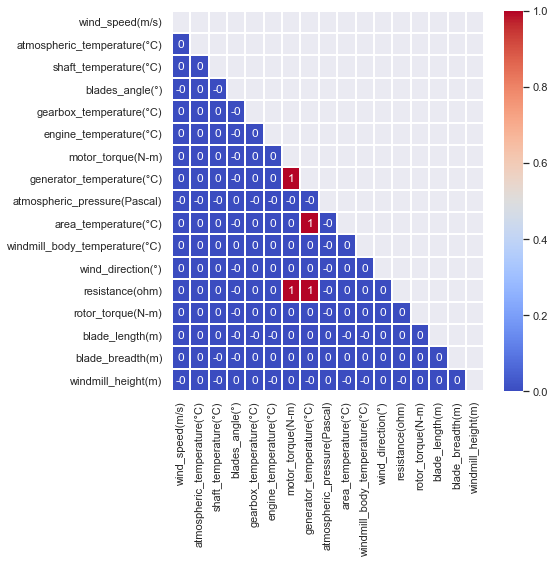

In [19]:
df=train_full.select_dtypes(exclude='object').corr().round()
mask = np.triu(np.ones_like(df, dtype=bool))
sns.set(rc = {'figure.figsize':(7,7)})
sns.heatmap(df,mask=mask,annot=True,cmap='coolwarm',linecolor='white',linewidths=1)

In [21]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(X):
    
    # Calculating VIF
    
    col_to_drop = X.select_dtypes(['object','datetime64[ns]']).columns
    X = X.drop(columns = col_to_drop)
    X = X.dropna(axis=0)
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF_Values"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    return(vif)

In [22]:
calc_vif(train_full)

,variables,VIF_Values
0,wind_speed(m/s),2.217880
1,atmospheric_temperature(°C),1.012716
2,shaft_temperature(°C),3.223292
3,blades_angle(°),1.143013
4,gearbox_temperature(°C),1.933977
5,engine_temperature(°C),43.865796
6,motor_torque(N-m),37.608210
7,generator_temperature(°C),101.150111
8,atmospheric_pressure(Pascal),1.144987
9,area_temperature(°C),26.684258


In [35]:
cols_to_drop=['engine_temperature(°C)','motor_torque(N-m)','generator_temperature(°C)',
              'area_temperature(°C)','resistance(ohm)','blade_breadth(m)','windmill_height(m)']

In [36]:
train_full.drop(cols_to_drop,axis=1,inplace=True)

In [37]:
test_full.drop(cols_to_drop,axis=1,inplace=True)

In [23]:
def compare_categorical_columns(df_train : pd.DataFrame,df_test : pd.DataFrame):
    l=df_train.select_dtypes(include='object').columns.tolist()
    for i in l:
        Train_list=df_train[i].unique().tolist()
        Test_list=df_test[i].unique().tolist()
        if set(Train_list)!=set(Test_list):
            Train_list=["nan" if x is np.nan else x for x in Train_list]
            Test_list=["nan" if x is np.nan else x for x in Test_list]
            Train_list.sort()
            Test_list.sort()
            print ('**** train:',i,Train_list,end='\n')
            print ('#### test:',i,Test_list,end='\n''\n')

In [117]:
compare_categorical_columns(train_full,test_full)

wind_speed(m/s) , 271 , 1 %
atmospheric_temperature(°C) , 3422 , 12 %
shaft_temperature(°C) , 2 , 0 %
blades_angle(°) , 212 , 1 %
gearbox_temperature(°C) , 1 , 0 %
atmospheric_pressure(Pascal) , 2690 , 10 %
windmill_body_temperature(°C) , 2352 , 8 %
wind_direction(°) , 5058 , 18 %
rotor_torque(N-m) , 567 , 2 %
turbine_status , 1747 , 6 %
cloud_level , 272 , 1 %
blade_length(m) , 5057 , 18 %


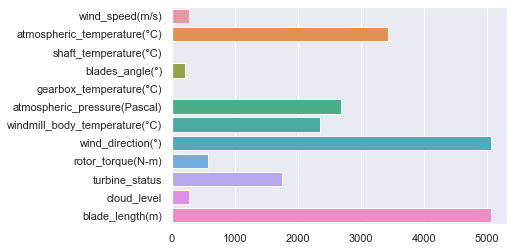

****
wind_speed(m/s) , 126 , 1 %
atmospheric_temperature(°C) , 1427 , 12 %
shaft_temperature(°C) , 1 , 0 %
blades_angle(°) , 106 , 1 %
gearbox_temperature(°C) , 1 , 0 %
atmospheric_pressure(Pascal) , 1151 , 10 %
windmill_body_temperature(°C) , 926 , 8 %
wind_direction(°) , 2160 , 18 %
rotor_torque(N-m) , 281 , 2 %
turbine_status , 797 , 7 %
cloud_level , 125 , 1 %
blade_length(m) , 2114 , 17 %


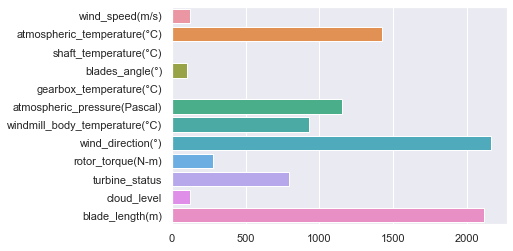

In [118]:
compare_null_values(train_full,test_full)

In [ ]:
"Processsing for PipeLine , CV & Model Selection"

In [38]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.metrics import mean_absolute_error

In [39]:
from sklearn.model_selection import train_test_split

y=train_full['windmill_generated_power(kW/h)']
train_full.drop(['windmill_generated_power(kW/h)'], axis=1,inplace=True)

X_train_full,X_valid_full,y_train,y_valid=train_test_split(train_full,y,train_size=0.8,test_size=0.2,random_state=0)

In [40]:
object_cols=[cols for cols in train_full.columns if train_full[cols].dtype=='object']

#good_cols=[cols for cols in object_cols if set(test[object_cols]).issubset(set(train[object_cols]))]

#categorical_cols=[cols for cols in good_cols and train[good_cols].nunique()<10 ]                                              
                                               
numerical_cols=[cols for cols in train_full.columns if train_full[cols].dtype in ['int64','float64']]

my_cols=object_cols+numerical_cols

X_train=X_train_full[my_cols].copy()
X_valid=X_valid_full[my_cols].copy()

In [69]:
object_cols

['turbine_status', 'cloud_level']

In [41]:
X_train.head(2)

,turbine_status,cloud_level,wind_speed(m/s),atmospheric_temperature(°C),shaft_temperature(°C),blades_angle(°),gearbox_temperature(°C),atmospheric_pressure(Pascal),windmill_body_temperature(°C),wind_direction(°),rotor_torque(N-m),blade_length(m)
15611,BD,Low,-32.32933,26.986519,45.418365,-0.33299,43.050239,17144.779919,43.066814,NaN,34.298018,3.539365
27743,BBB,Medium,16.20677,8.396372,45.767251,-1.00041,43.653480,112713.546224,41.407374,264.988175,13.233969,3.929870


In [42]:
from sklearn.impute import SimpleImputer
numerical_transformer=SimpleImputer(strategy='most_frequent')
categorical_transformer=Pipeline(steps=[('imputer', SimpleImputer(strategy='most_frequent')),
                                         ('onehot',OneHotEncoder(handle_unknown='ignore'))])
preprocessor=ColumnTransformer(transformers=[
    ('num',numerical_transformer,numerical_cols),
    ('cat',categorical_transformer,object_cols)
])


In [43]:
from sklearn.ensemble import RandomForestRegressor
model=RandomForestRegressor(n_estimators=50,random_state=0)

In [44]:
my_pipeline=Pipeline(steps=[('preprocessor',preprocessor),('model',model)])

In [14]:
my_pipeline.fit(X_train,y_train)
preds=my_pipeline.predict(X_valid)
score=mean_absolute_error(y_valid,preds)
print('MAE is:',score)

MAE is: 0.5189838266863931


In [17]:
from sklearn.model_selection import cross_val_score

# Multiply by -1 since sklearn calculates *negative* MAE
scores = -1 * cross_val_score(my_pipeline, train_full, y,
                              cv=3,
                              scoring='neg_mean_absolute_error')

print("MAE scores:\n", scores)

MAE scores:
 [0.52583347 0.50604751 0.51104845]


In [24]:
print('Average MAE score:',scores.mean())

Average MAE score: 0.5143098095984242


In [18]:
def get_score(n_estimators):
    """Return the average MAE over 3 CV folds of random forest model.
    
    Keyword argument:
    n_estimators -- the number of trees in the forest
    """
    my_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', RandomForestRegressor(n_estimators, random_state=0))])
    scores = -1 * cross_val_score(my_pipeline, train_full[my_cols], y,
                              cv=3,
                              scoring='neg_mean_absolute_error')
    return scores.mean()
    pass

In [19]:
results = {}
for i in range(1,5):
    results[10*i] = get_score(10*i) 

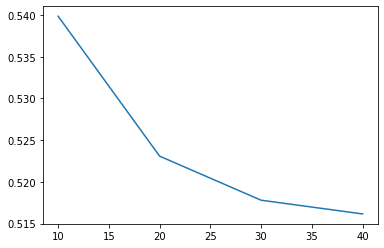

In [20]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(list(results.keys()), list(results.values()))
plt.show()

In [47]:
"Trying with other models"

from sklearn.linear_model import LinearRegression
model1=LinearRegression()
my_pipeline1=Pipeline(steps=[('preprocessor',preprocessor),('model1',model1)])
my_pipeline1.fit(X_train,y_train)
preds=my_pipeline1.predict(X_valid)
score=mean_absolute_error(y_valid,preds)
print('MAE is:',score)

MAE is: 2.1165664942573925


In [58]:
from sklearn.model_selection import cross_val_score

# Multiply by -1 since sklearn calculates *negative* MAE
scores = -1 * cross_val_score(my_pipeline1, train_full, y,
                              cv=3,
                              scoring='neg_mean_absolute_error')

print("MAE scores:\n", scores,'\n')

print('average of MAE scores for CV=3 with model Linear Regression is:',scores.mean().round(3))

MAE scores:
 [2.08491769 2.08176129 2.05340391] 

average of MAE scores for CV=3 with model Linear Regression is: 2.073


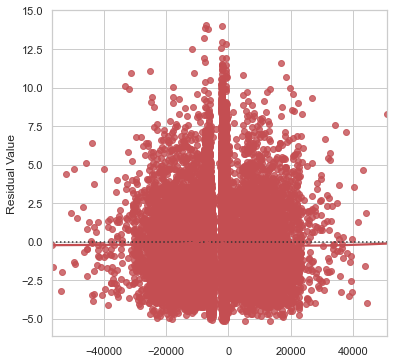

In [93]:
"Checking the non-linearity of Predicted Y vs. difference of Actual Y & Predicted Y"

"Simple Imputer"

simple_imputer=SimpleImputer(strategy='most_frequent')
X=pd.DataFrame(simple_imputer.fit_transform(train_full),columns=list(train_full.columns))

"One Hot Encoding"


OH=OneHotEncoder(handle_unknown='ignore',sparse=False)

Z=pd.DataFrame(OH.fit_transform(X[object_cols]))

"Combining both the datasets"

Z=pd.concat([Z,X.drop(['turbine_status', 'cloud_level'],axis=1)],axis=1)

Residual=pd.DataFrame(
    {
        'Y Value':y,
        'Computed Y value':model1.predict(Z),
        'Residual Value':y-model1.predict(Z)
    }
)

sns.set_theme(style="whitegrid")
#define figure size
fig = plt.figure(figsize=(6,6))

#produce regression plots
fig=sns.residplot(x=model1.predict(Z), y=Residual['Residual Value'],lowess=True,color="r")

"No discernible pattern; hence there is no non-linearity in the model"

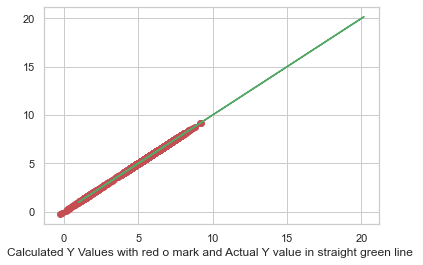

In [114]:
#Prediction
preds=my_pipeline1.predict(train_full[my_cols])
plt.xlabel('Calculated Y Values with red ''o'' mark and Actual Y value in straight green line ')


# red dashes, blue squares and green triangles
plt.plot(preds, preds, 'ro', y, y, 'g')
plt.show()




#plt.scatter(x=y_valid,y=preds)
#plt.scatter(x=y_valid)

<AxesSubplot:xlabel='windmill_generated_power(kW/h)'>

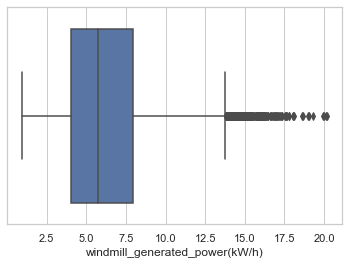

In [117]:
sns.boxplot(x=y)

In [121]:
"With KNN model"

from sklearn.neighbors import KNeighborsRegressor
model2=KNeighborsRegressor()

my_pipeline2=Pipeline(steps=[('preprocessor',preprocessor),('model2',model2)])
my_pipeline2.fit(X_train,y_train)
preds=my_pipeline1.predict(X_valid)
score=mean_absolute_error(y_valid,preds)
print('MAE is:',score)


MAE is: 2.1165664942573925


In [128]:
from sklearn.model_selection import cross_val_score

# Multiply by -1 since sklearn calculates *negative* MAE
scores = -1 * cross_val_score(my_pipeline2, train_full, y,
                              cv=3,
                              scoring='neg_mean_absolute_error')

print("MAE scores:\n", scores,'\n')

print('average of MAE scores for CV=3 with model Linear Regression is:',scores.mean().round(3))

MAE scores:
 [1.50795728 1.47521319 1.47478732] 

average of MAE scores for CV=3 with model Linear Regression is: 1.486


In [126]:
def get_score2(n_neighbors):
    """Return the average MAE over 3 CV folds of KNN.
    
    Keyword argument:
    n_neighbors -- the number of neighbouring elements in the regression model
    """
    my_pipeline2 = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model2', KNeighborsRegressor(n_neighbors))])
    scores = -1 * cross_val_score(my_pipeline, train_full, y,
                              cv=3,
                              scoring='neg_mean_absolute_error')
    return scores.mean()
    pass

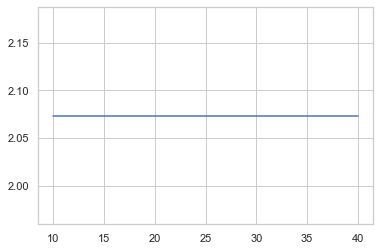

In [127]:
"Chnage values of neighbors"
results = {}
for i in range(1,5):
    results[10*i] = get_score2(10*i) 
    
"Plot in graph"
plt.plot(list(results.keys()), list(results.values()))
plt.show()